In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
airline = pd.read_csv('airpassenger.csv',index_col='Month',parse_dates=True)

In [7]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


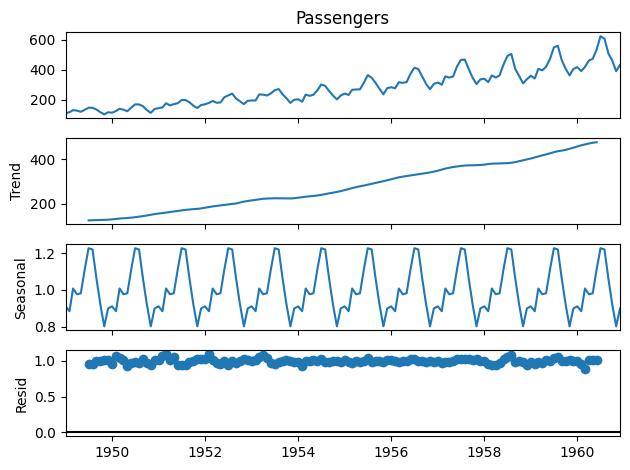

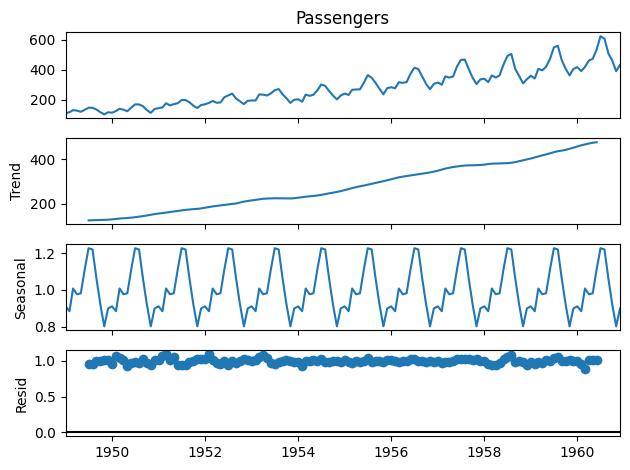

In [10]:
result = seasonal_decompose(airline['Passengers'],model='multiplicative')
result.plot()

In [11]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit = auto_arima(airline['Passengers'],start_p=1,start_q=1,max_p=3,max_q=3,m=12)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 22 Nov 2024   AIC                           1019.178
Time:                                     08:37:26   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:]

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(airline['Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))
result = model.fit()

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.959
Date:                            Fri, 22 Nov 2024   AIC                           1013.917
Time:                                    08:43:23   BIC                           1028.293
Sample:                                01-01-1949   HQIC                          1019.759
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4242      0.068     -6.205      0.000      -0.558      -0.290
ar.S.L12       0.6677      0.153      4.369      0.000       0.368       0.967
ar.S.L24       0.3310      0.096      3.443      0.001       0.143       0.519
ma.S.L12      -0.9755      1.251     -0.780      0.436      -3.428       1.477
sigma2       110.5949    116.451      0.950      0.342    -117.644     338.834
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.59
Prob(Q):                              0.92   Prob(JB):                         0.02
Heteroskedasticity (H):               2.80   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

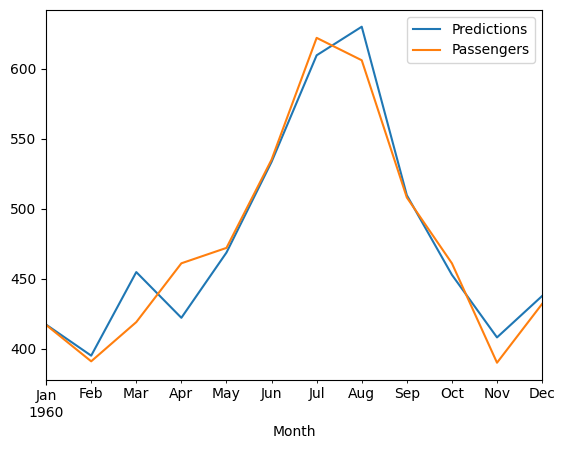

In [22]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start,end,typ='levels').rename("Predictions")
predictions.plot(legend=True)
test['Passengers'].plot(legend=True)


In [23]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse

rmse(test['Passengers'],predictions)

18.21273386582764

In [24]:
mean_squared_error(test['Passengers'],predictions)

331.703674867465

In [25]:
model = SARIMAX(airline['Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))

In [26]:
forecast = result.predict(start=len(airline),end=(len(airline)-1) + 3*12,typ='levels').rename("Forecast")

<Axes: xlabel='Month'>

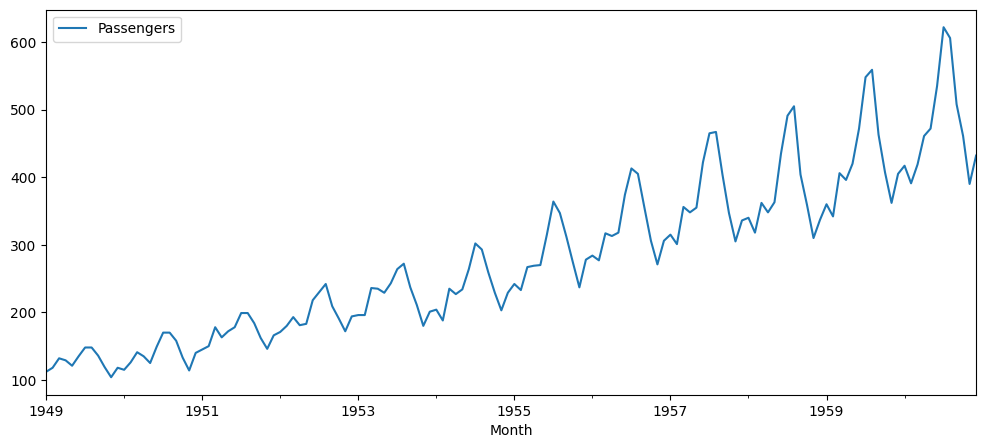

In [27]:
airline['Passengers'].plot(figsize=(12,5),legend=True)

<Axes: >

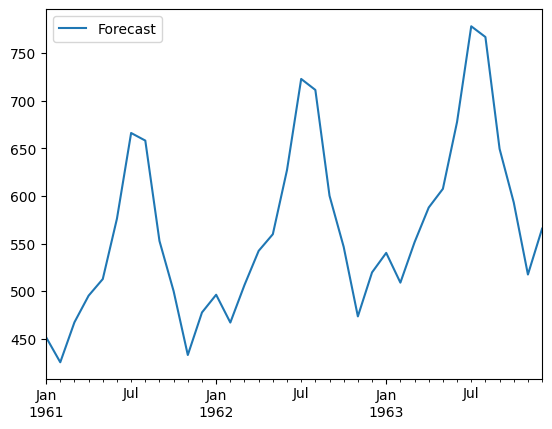

In [28]:
forecast.plot(legend=True)